# **Residential real estate price prediction with Random Forest model**
---


## **Contents**

- 1 - Introduction

- 2 - Import handling

- 3 - Data retrieval and exploration

- 4 - Data cleaning

- 5 - Modelling

- 6 - Final predictions and submission

## **1 - Introduction**

In this notebook, I will model and forecast house prices using a Random Forest algorithm and housing data from Ames, Iowa. The resultant predictions will then be submmited to the Housing Prices Competition for Kaggle Learn Users. 


## **2 - Import handling**

In [1]:

# Importing libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



## **3 -  Data retrieval and exploration**

### 3.1 - Retrieval

In [2]:

# Reading training data into Pandas DataFrame object
data = pd.read_csv('train.csv')

# Reading test data file into Pandas DataFrame object
test_data = pd.read_csv('test.csv')


### 3.2 - General overview

In [3]:
# Examining the first five training data rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Deleting 'Id' column from training dataset
data = data.drop('Id', axis=1)

# Examining the first five test data rows
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:

# General overview of training dataset
print('')
data.info()
print('')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBui

In [6]:

# General overview of test dataset
print('')
test_data.info()
print('')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  Overall

### 3.3 - Distribution of data for numerical features

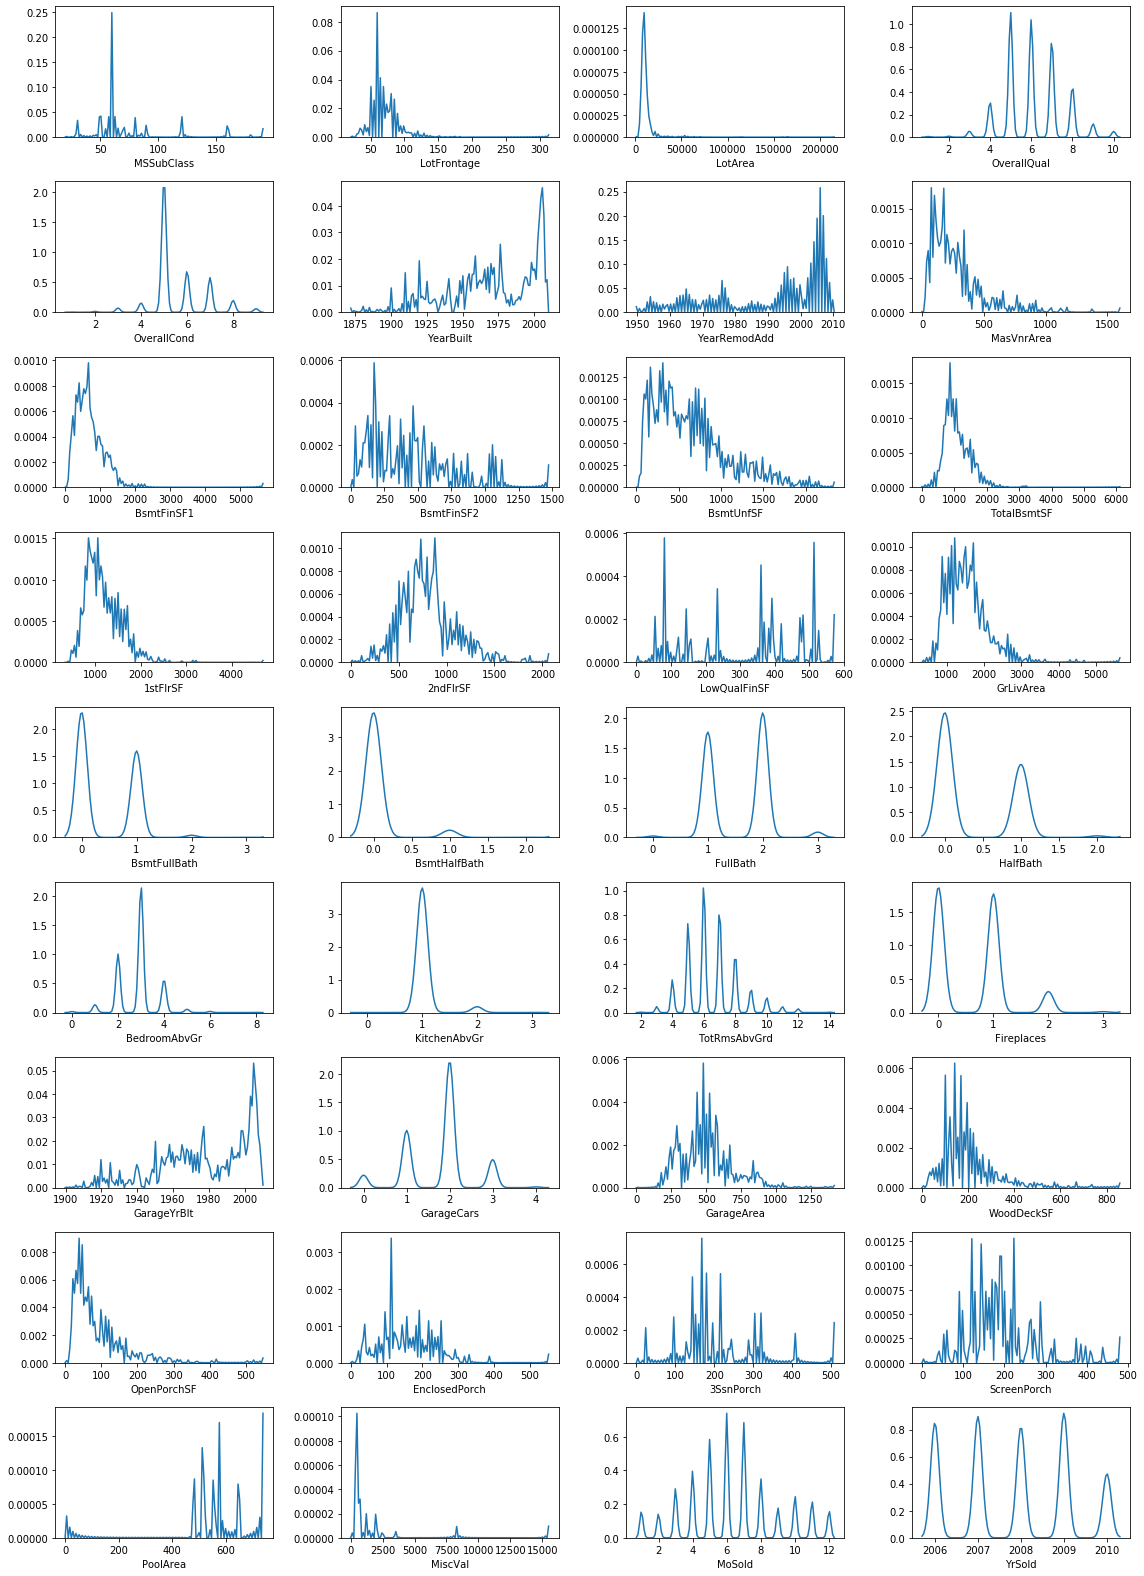

In [7]:

# Separating data for numerical features
num_feats = data.select_dtypes(include='number').drop(['SalePrice'], axis=1).copy()

# Plotting distribution of data for numerical features
fig = plt.figure(figsize=(16,22))
for i in range(len(num_feats.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_feats.iloc[:,i].dropna(), hist=False, kde_kws={'bw':0.1})
    plt.xlabel(num_feats.columns[i])
plt.tight_layout()
plt.show()


### 3.4 - Distribution of data for categorical features

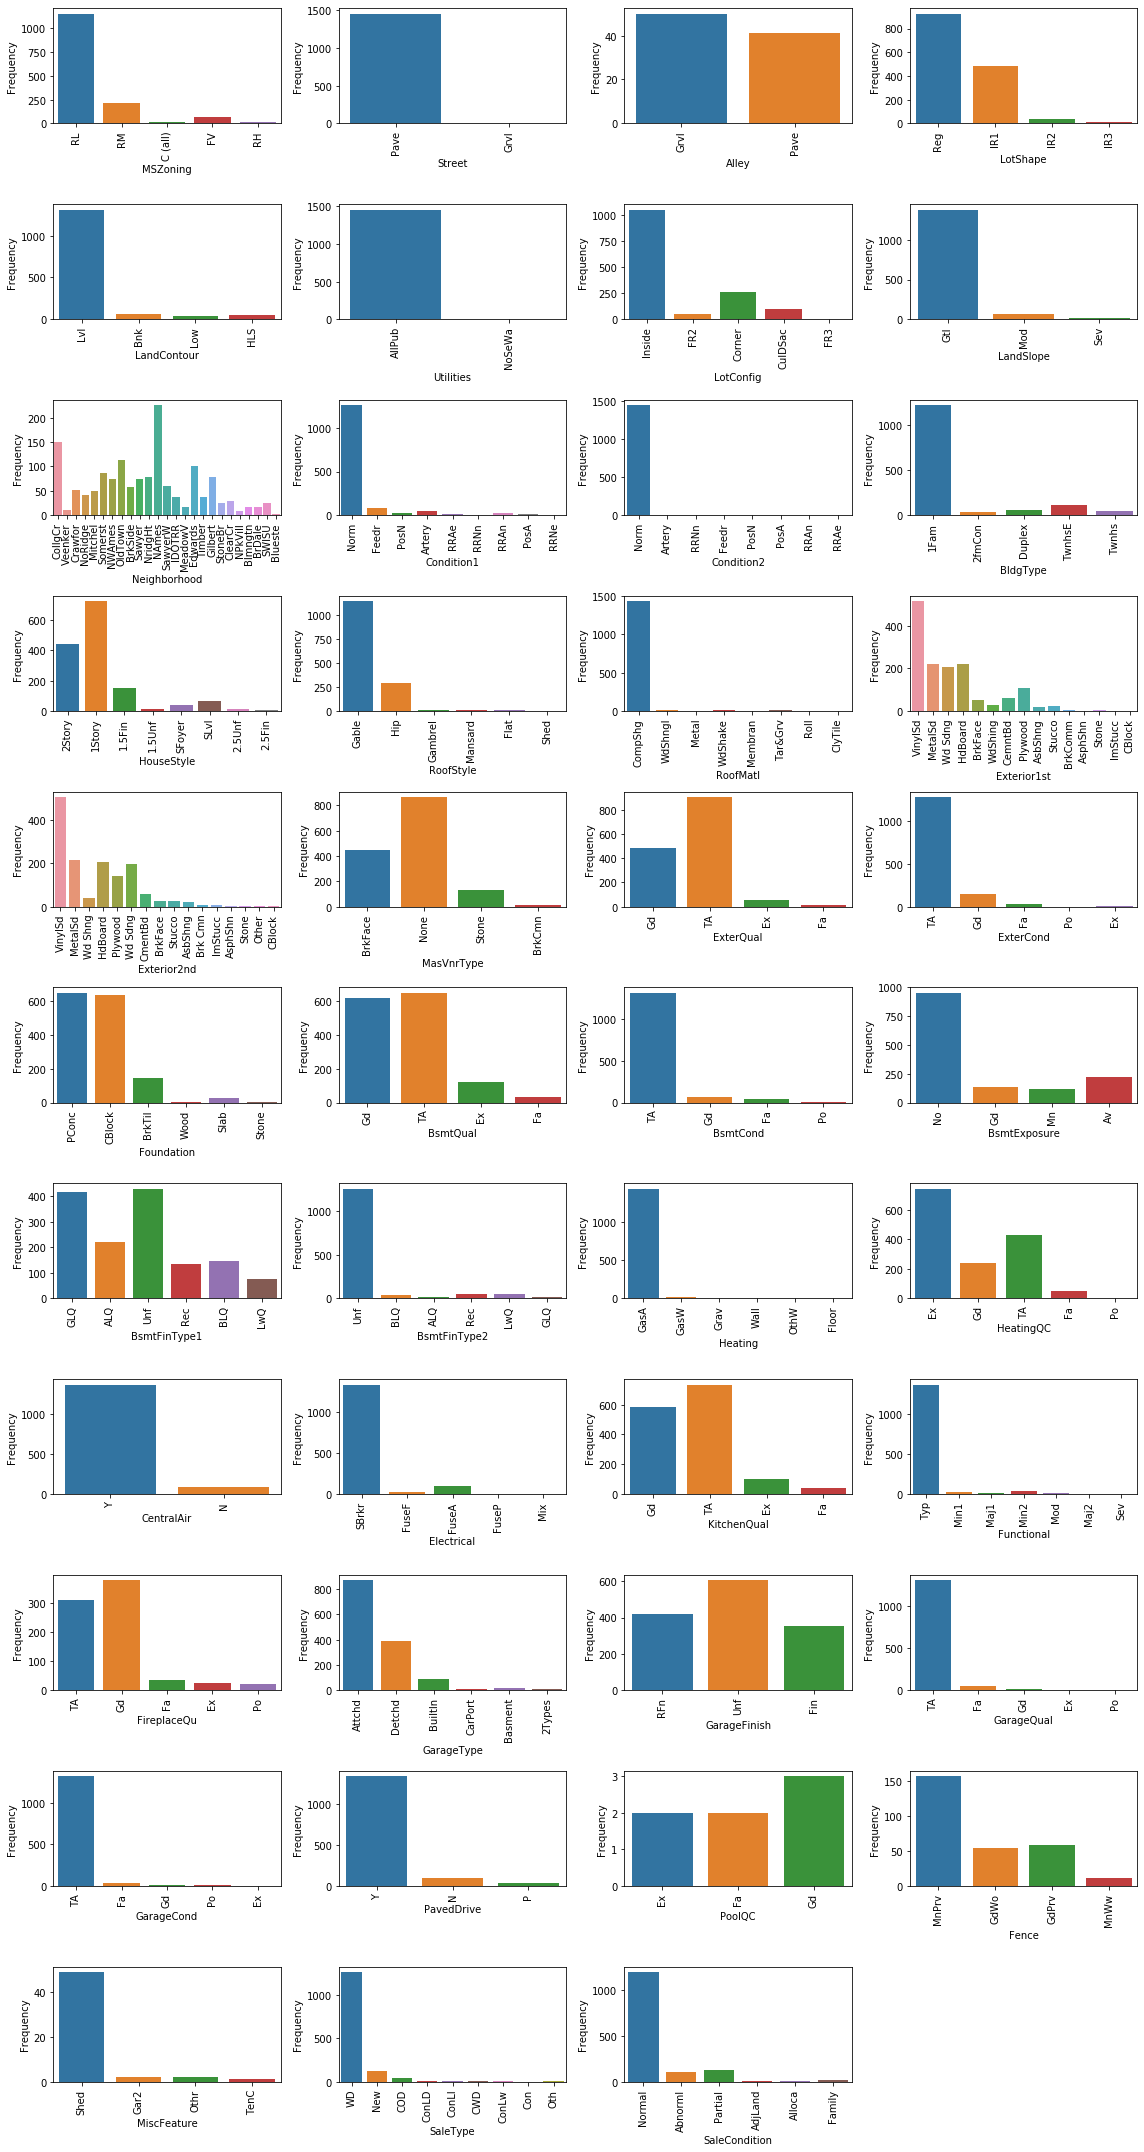

In [8]:

# Separating data for categorical features
cat_feats = data.select_dtypes(exclude='number').copy()

# Plotting distribution of data for categorical features
fig = plt.figure(figsize=(16,30))

for i in range(len(cat_feats.columns)):
    fig.add_subplot(11,4,i+1)
    sns.countplot(x=cat_feats.iloc[:,i].dropna())
    plt.xlabel(cat_feats.columns[i])
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### 3.5 - Bivariate analysis of numerical features

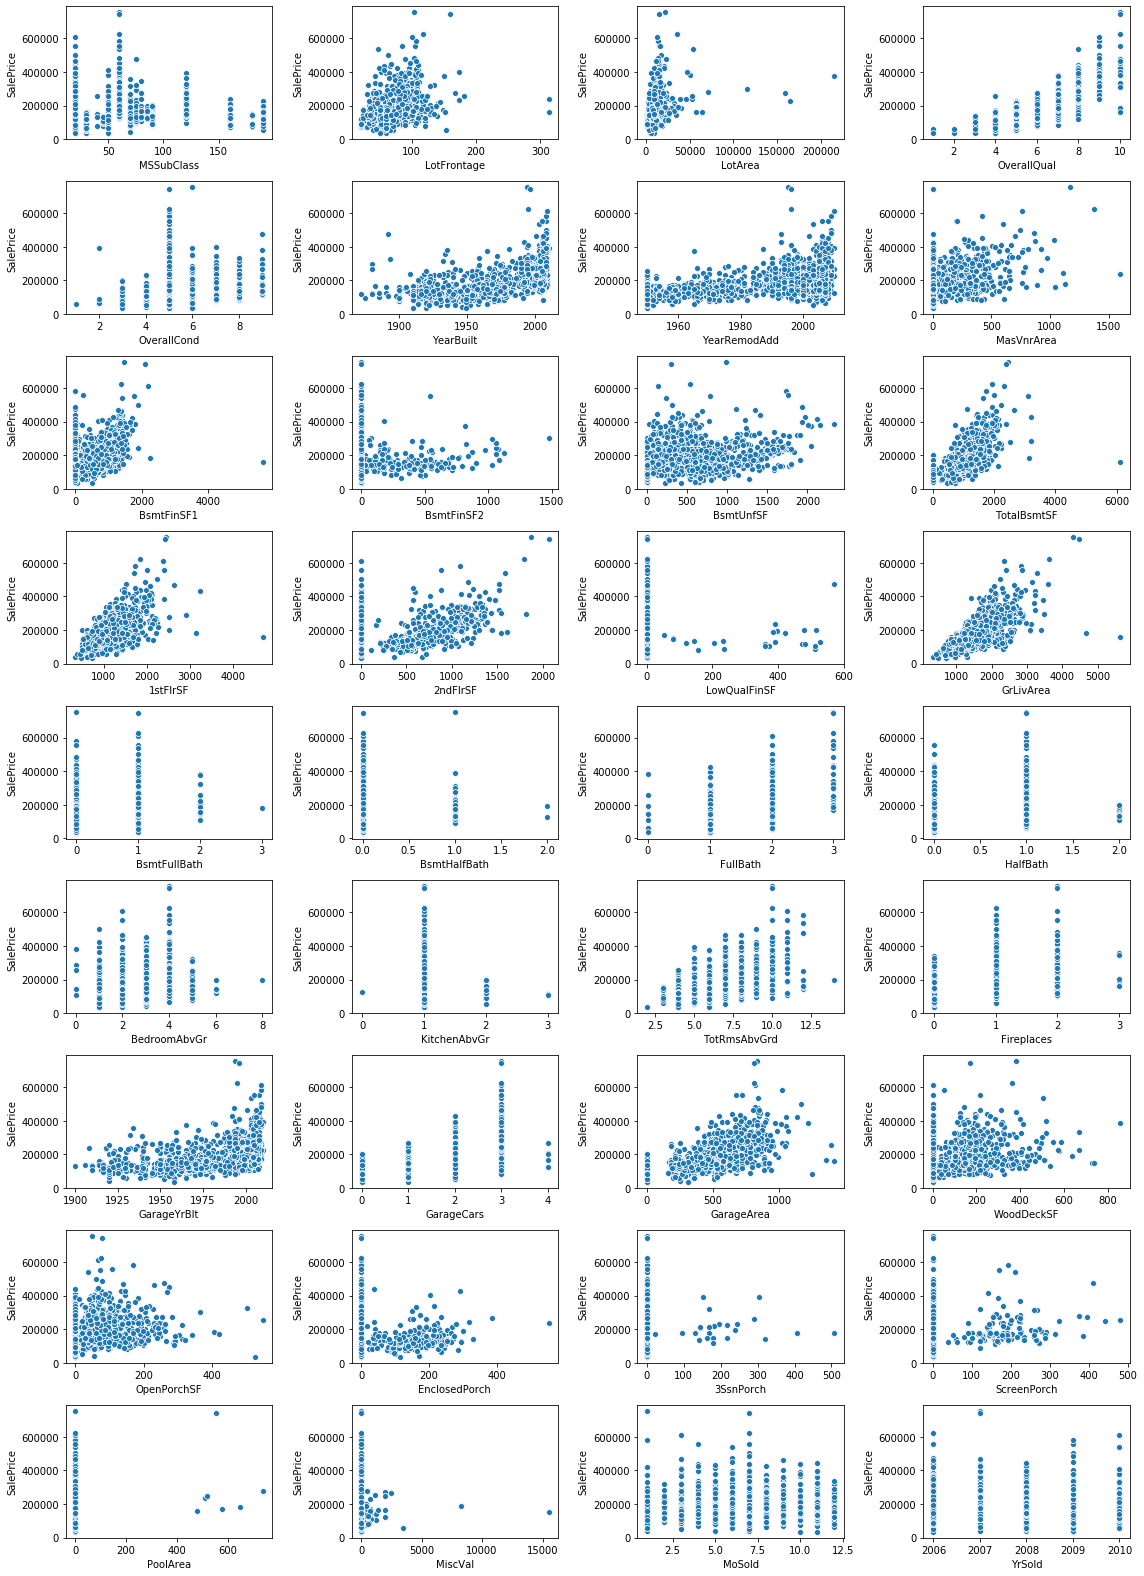

In [9]:

# Plotting scaterrplots of numerical features versus the target variable 'SalePrice'
fig = plt.figure(figsize=(16,22))
for i in range(len(num_feats.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(num_feats.iloc[:, i],data['SalePrice'])
plt.tight_layout()
plt.show()


### 3.6 - Distribution of missing values

Text(0.5, 1.0, 'Missing values in test data')

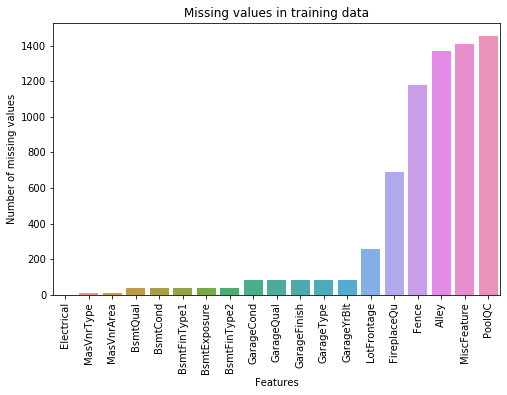

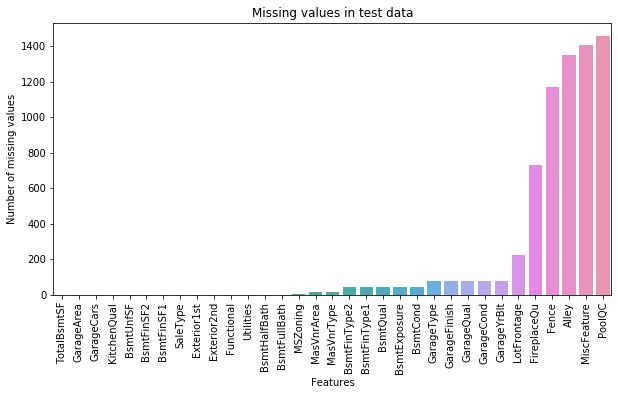

In [10]:

# Plotting missing value counts for features in training data
print('')

missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.reset_index(inplace=True)
missing.columns=['Features', 'Number of missing values']

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Features', y='Number of missing values', data=missing)
plt.xticks(rotation=90)
plt.title('Missing values in training data')

print('')
print('')

# Plotting missing value counts for features in test data
missing = test_data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.reset_index(inplace=True)
missing.columns=['Features', 'Number of missing values']

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Features', y='Number of missing values', data=missing)
plt.xticks(rotation=90)
plt.title('Missing values in test data')


## **4 - Data cleaning**

### 4.1 - Outliers

From section 3.4, we identified potential outlier data points for the following features:
- `LotFrontage`
- `LotArea`
- `MasVnrArea`
- `BsmtFinSF1`
- `TotalBsmtSF`
- `1stFlrSF`
- `LowQualFinSF`
- `GrlLivArea`
- `EnclosedPorch`
- `MiscVal`

By making a closer examination of these features' scatterplots against `SalePrice` we can confirm whether they are outliers and delete their entries from the dataset:


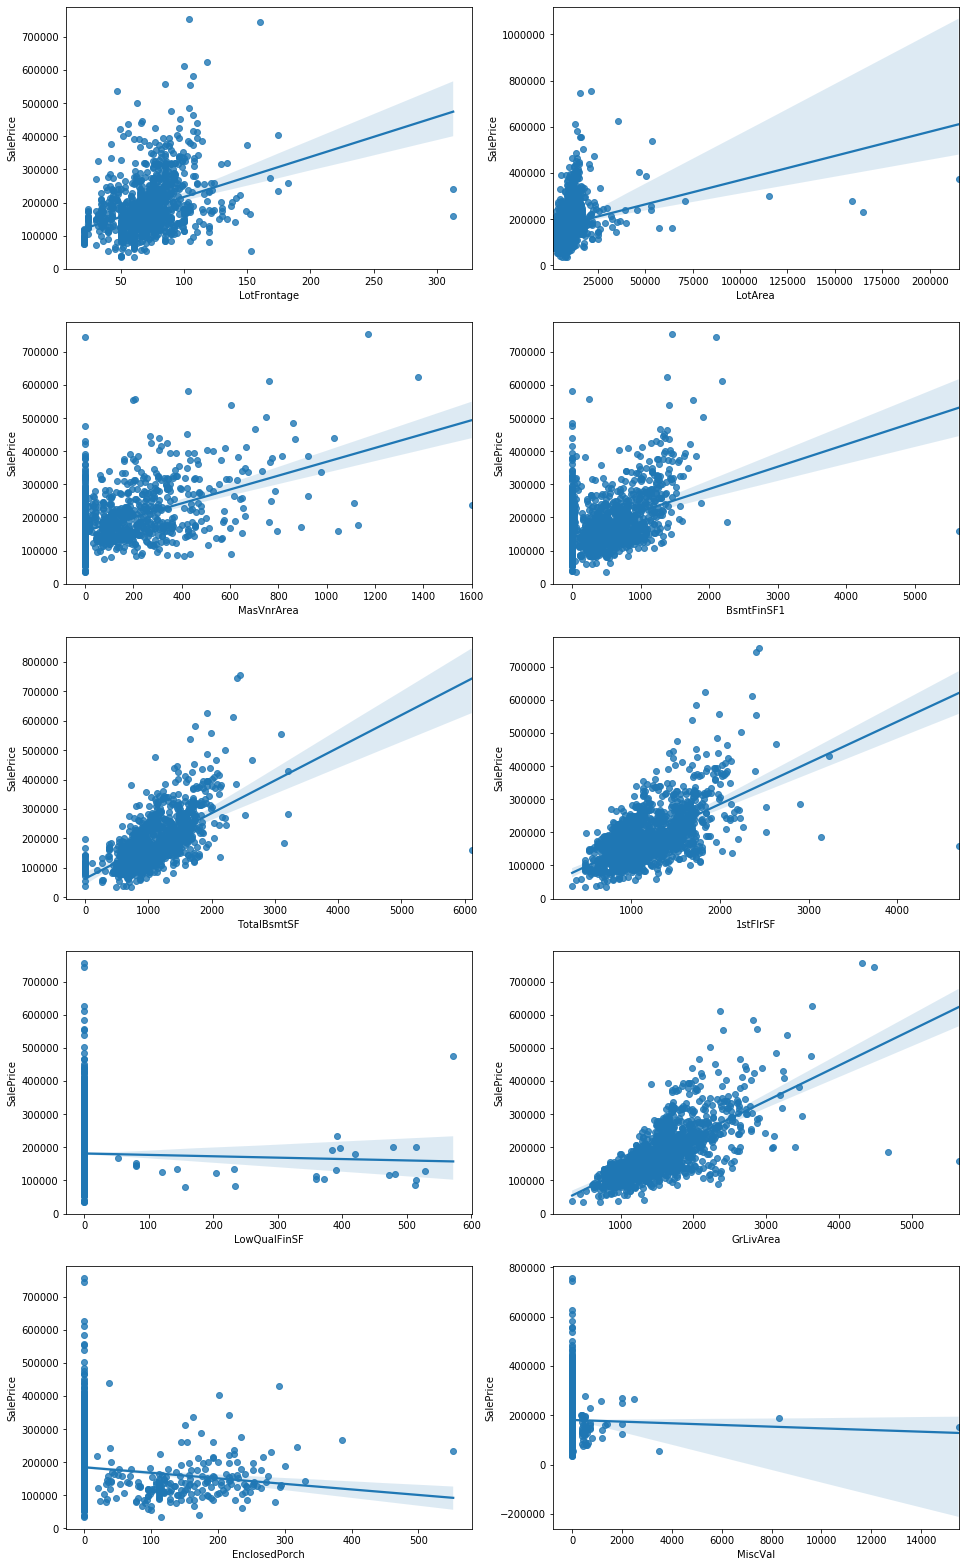

In [11]:

# Plotting enlarged scatterplots of numerical features with possible outliers versus 'SalePrice', along with fitted regresssion lines
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(data['LotFrontage'], data['SalePrice'], ax=ax1)
_ = sns.regplot(data['LotArea'], data['SalePrice'], ax=ax2)
_ = sns.regplot(data['MasVnrArea'], data['SalePrice'], ax=ax3)
_ = sns.regplot(data['BsmtFinSF1'], data['SalePrice'], ax=ax4)
_ = sns.regplot(data['TotalBsmtSF'], data['SalePrice'], ax=ax5)
_ = sns.regplot(data['1stFlrSF'], data['SalePrice'], ax=ax6)
_ = sns.regplot(data['LowQualFinSF'], data['SalePrice'], ax=ax7)
_ = sns.regplot(data['GrLivArea'], data['SalePrice'], ax=ax8)
_ = sns.regplot(data['EnclosedPorch'], data['SalePrice'], ax=ax9)
_ = sns.regplot(data['MiscVal'], data['SalePrice'], ax=ax10)


In [12]:

# Deleting outliers from dataset
data = data.drop(data[data['LotFrontage']>200].index)
data = data.drop(data[data['LotArea']>100000].index)
data = data.drop(data[data['MasVnrArea']>1200].index)
data = data.drop(data[data['BsmtFinSF1']>4000].index)
data = data.drop(data[data['TotalBsmtSF']>4000].index)
data = data.drop(data[data['1stFlrSF']>4000].index)
data = data.drop(data[(data['LowQualFinSF']>550) & (data['SalePrice']>400000)].index)
data = data.drop(data[data['GrLivArea']>4000].index)
data = data.drop(data[data['EnclosedPorch']>500].index)
data = data.drop(data[data['MiscVal']>5000].index)

# Printing dataset summary
print('')
data.info(verbose= False)
print('')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 80 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), object(43)
memory usage: 914.4+ KB



### 4.2 - Missing Values


From section 3.2 and the vizualizations in section 3.6, two things are made evident:

1. There are many more features with missing data in the test dataset than in the training dataset
2. The same handful of features (`PoolQC`, `MiscFeature`, `Alley`, `Fence`, and `FireplaceQu`) are missing data for the majority of entries in both the training and test dataset

Hence, we decide to deal with missing values as follows:
- The following features will be deleted from both datasets: `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`
- For numeric features with a continuous sample space, missing values will be replaced by the feature mean
- For numeric features with a discrete sample space, missing values will be replaced by the rounded feature mean
- For categorical features, missing values will be replaced by the feature mode


In [13]:

# Checking training and testing datasets missing value percentage
null = pd.DataFrame(data={'%Missing Values (training)': data.isnull().mean()[data.isnull().mean() > 0], '%Missing Values (test)': test_data.isnull().mean()[test_data.isnull().mean() > 0]})
null = round(null* 100, 2)
null = null.sort_values(by= '%Missing Values (training)', ascending=False)

null.index.name='Feature'
null


,%Missing Values (training),%Missing Values (test)
Feature,,
PoolQC,99.72,99.79
MiscFeature,96.54,96.50
Alley,93.77,92.67
Fence,80.76,80.12
FireplaceQu,47.68,50.03
LotFrontage,17.58,15.56
GarageFinish,5.61,5.35
GarageQual,5.61,5.35
GarageType,5.61,5.21


In [14]:

# Deleting PoolQC, MiscFeature, Alley, Fence, and FireplaceQu from training and test datasets
data = data.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])
test_data = test_data.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

# Separating numerical feature names and categorical feature names
num_cont_feats = list(data.select_dtypes(include='float').columns)
num_dis_feats = list(data.select_dtypes(include='int').drop(['SalePrice'], axis=1).columns)
cat_feats = list(data.select_dtypes(exclude='number').columns)

# Filling in missing values
for feat in num_cont_feats:
    data[feat] = data[feat].fillna(data[feat].mean())
    test_data[feat] = test_data[feat].fillna(test_data[feat].mean())

for feat in num_dis_feats:
    data[feat] = data[feat].fillna(round(data[feat].mean()))
    test_data[feat] = test_data[feat].fillna(round(test_data[feat].mean()))


for feat in cat_feats:
    data[feat] = data[feat].fillna(data[feat].mode()[0])
    test_data[feat] = test_data[feat].fillna(test_data[feat].mode()[0])

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')
print('Test dataset:')
test_data.info(verbose=False)
print('')



Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 75 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), object(38)
memory usage: 858.0+ KB

Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 75 entries, Id to SaleCondition
dtypes: float64(11), int64(26), object(38)
memory usage: 855.0+ KB



### 4.4 - Categorical features

In [15]:

# Getting categorical feature column names
cat_feats = list(data.select_dtypes(exclude='number').columns)

# Transforming categorical features into dummy features
data = pd.get_dummies(data, columns=cat_feats, prefix= cat_feats)
test_data = pd.get_dummies(test_data, columns=cat_feats, prefix= cat_feats)

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')
print('Test dataset:')
test_data.info(verbose=False)
print('')



Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 269 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(232)
memory usage: 756.4 KB

Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 255 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(218)
memory usage: 732.5 KB




After inspecting the summary of both datasets, it is evident that the training datset now contains data on more features than the test dataset. This occurs due to the dummy encoding process in the previous cell, as it is likely that some categorical features in the training dataset contain values that aren't reported for any of the entries in the test dataset, resulting in additional dummy features being created. In order to prevent these features from being fitted into the model, we delete them from the training dataset:


In [16]:

# Deleting training dataset features that don't appear in test dataset
test_feats = list(test_data.columns) #.append('SalePrice')
test_feats.append('SalePrice')
test_feats.remove('Id')

data = data[test_feats]

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')
print('Test dataset:')
test_data.info(verbose=False)
print('')



Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 255 entries, MSSubClass to SalePrice
dtypes: float64(3), int64(34), uint8(218)
memory usage: 736.6 KB

Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 255 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(218)
memory usage: 732.5 KB



## **5 - Modelling**

### 5.1 - Evaluation metrics


As specified in the competition details, the metric used to evaluate prediction accuracy is the Root-Mean-Squared-Error (RMSE) between the logarithm of actual sale prices and the logarithm of predicted sale prices. Nevertheless, the score displayed on the competition leaderboard actually corresponds to the Mean-Absolute-Error (MAE) of predictions. Therefore, we define the following function below so that we can assess the accuracy of our models based on these two metrics:


In [17]:
 
def score(y,y_predictions):
    
    msle = mean_squared_log_error(y, y_predictions)
    mae = mean_absolute_error(y, y_predictions)
    print('RMSLE: ', round((msle)**0.5 , 5))
    print('MAE: ', round(mae, 5))


### 5.2 - Data preparation

In [18]:

# Splitting training data into temporary training-validation subsamples
y = data['SalePrice']
X = data.drop('SalePrice',axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=0)


### 5.3 - Feature selection and engineering

In [19]:

# Fitting first RF model
model_1 = RandomForestRegressor(random_state=0)
model_1.fit(X_train, y_train)

# Listing features in order of importance
feature_importance = pd.DataFrame(data={'Feature': X_train.columns,'Gini Importance': model_1.feature_importances_ })
feature_importance = round(feature_importance, 3).set_index('Feature').sort_values(by='Gini Importance', ascending=False)
feature_importance


,Gini Importance
Feature,
OverallQual,0.551
GrLivArea,0.114
1stFlrSF,0.050
TotalBsmtSF,0.047
BsmtFinSF1,0.028
...,...
HouseStyle_2Story,0.000
HouseStyle_SFoyer,0.000
HouseStyle_SLvl,0.000



As shown in the table above, many of the dataset features carry zero Gini Importance when fitted into the RF model. Consequently, these features will not be selected into the RF model in order to improve the model's computational efficiency and runtime:


In [20]:

# Selecting features with Gini Importance > 0
selected_features = list(feature_importance[feature_importance['Gini Importance']>0].index)

# Printing out names of selected features
print('')
print('Selected Features:')
print('')

for feature in selected_features:
    print(feature)
    
print('')

# Construct reduced feature matrices for training and test samples
X_selected_train = X_train[selected_features]
X_selected_val = X_val[selected_features]

# Fitting second RF model using only selected features 
model_2 = RandomForestRegressor(random_state=0)
model_2.fit(X_selected_train, y_train)

# Predicting target variable for test sample using model_1 and model_2
y_preds_1 = model_1.predict(X_val)
y_preds_2 = model_2.predict(X_selected_val)

# Calculating mean squared error for model_1 and model_2
print('Score for model_1 predictions (trained with all features): ')
score(y_val, y_preds_1)
print('')
print('Score for model_2 predictions (trained using only selected features): ')
score(y_val, y_preds_2)



Selected Features:

OverallQual
GrLivArea
1stFlrSF
TotalBsmtSF
BsmtFinSF1
GarageArea
GarageCars
LotArea
YearBuilt
BsmtQual_Ex
OpenPorchSF
TotRmsAbvGrd
GarageFinish_Unf
YearRemodAdd
BsmtUnfSF
MasVnrArea
ExterQual_Ex
OverallCond
LotFrontage
2ndFlrSF
WoodDeckSF
GarageYrBlt
MoSold
Fireplaces
BsmtExposure_No
KitchenQual_Gd
Neighborhood_StoneBr
KitchenQual_Ex
LotShape_Reg
KitchenQual_TA
GarageType_Detchd
YrSold
MSSubClass
BsmtQual_Gd
MasVnrType_Stone
BsmtFullBath
FullBath
RoofStyle_Hip
CentralAir_Y
Exterior2nd_Plywood
GarageType_Attchd
ExterQual_TA
ExterCond_Fa
CentralAir_N
BsmtQual_TA
HeatingQC_Ex
BsmtFinType1_GLQ
Foundation_PConc
BsmtExposure_Gd
BsmtExposure_Av
RoofStyle_Gable
GarageFinish_Fin
Exterior2nd_VinylSd
SaleCondition_Normal
MSZoning_RM
EnclosedPorch
SaleCondition_Family
MSZoning_RL
LotShape_IR1
HalfBath
KitchenAbvGr
BedroomAbvGr

Score for model_1 predictions (trained with all features): 
RMSLE:  0.13736
MAE:  16764.8074

Score for model_2 predictions (trained using only selecte

### 5.4 - Hyperparameter tuning

The focus of this section will be on tuning the following Random Forest hyperparameters in order to prevent overfitting:
- max_depth
- min_sample_split
- min_samples_leaf
- n_estimators


In [21]:

# Tuning max_depth parameter
min_mae = 35000
depth_star = 0

for depth in range(5,30, 1):    
    model_3 = RandomForestRegressor(random_state=0, max_depth=depth)
    model_3.fit(X_selected_train, y_train)
    y_preds_3 = model_3.predict(X_selected_val)
    mae = round(mean_absolute_error(y_val, y_preds_3), 5)
    
    if mae < min_mae:
        depth_star = depth
        min_mae = mae  

print('')
print('Optimal max_depth = ',depth_star )
print('MAE for model 3 (with optimal max_depth): ', min_mae )
print('')



Optimal max_depth =  16
MAE for model 3 (with optimal max_depth):  16686.82668



In [22]:

# Tuning min_samples_split parameter
min_mae = 35000
samples_star = 0

for samples in range(2,10, 1):    
    model_4 = RandomForestRegressor(random_state=0, max_depth=16, min_samples_split=samples)
    model_4.fit(X_selected_train, y_train)
    y_preds_4 = model_4.predict(X_selected_val)
    mae = round(mean_absolute_error(y_val, y_preds_4), 5)
    
    if mae < min_mae:
        samples_star = samples
        min_mae = mae

print('')
print('Optimal min_samples_split = ',samples_star )
print('MAE for model 4 (with optimal max_depth): ', min_mae )
print('')



Optimal min_samples_split =  2
MAE for model 4 (with optimal max_depth):  16686.82668



In [23]:

# Tuning min_samples_leaf parameter
min_mae = 35000
samples_star = 0

for samples in range(1,20, 1):    
    model_5 = RandomForestRegressor(random_state=0, max_depth=16, min_samples_split=2, min_samples_leaf=samples)
    model_5.fit(X_selected_train, y_train)
    y_preds_5 = model_5.predict(X_selected_val)
    mae = round(mean_absolute_error(y_val, y_preds_5), 5)
    
    if mae < min_mae:
        samples_star = samples
        min_mae = mae

print('')
print('Optimal min_samples_leaf = ',samples_star )
print('MAE for model 5 (with optimal min_samples_leaf): ', min_mae )
print('')


Optimal min_samples_leaf =  1
MAE for model 5 (with optimal min_samples_leaf):  16686.82668



In [24]:

# Tuning n_estimators parameter
min_mae = 35000
arg_star = 0

for arg in range(150,201,1):    
    model_6 = RandomForestRegressor(random_state=0, max_depth=16, min_samples_split=2, min_samples_leaf=1, n_estimators=arg)
    model_6.fit(X_selected_train, y_train)
    y_preds_6 = model_6.predict(X_selected_val)
    mae = round(mean_absolute_error(y_val, y_preds_6), 5)
    
    if mae < min_mae:
        arg_star = arg
        min_mae = mae

print('')
print('Optimal n_estimators = ',arg_star )
print('MAE for model 6 (with optimal n_estimators): ', min_mae )
print('')



Optimal n_estimators =  180
MAE for model 6 (with optimal n_estimators):  16455.55136



### 5.5 - Final Model

In [25]:
# Separating target variable vector y
y = data['SalePrice']

# Creating feature matrix X
X = data[selected_features]

# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_final_model = RandomForestRegressor(random_state=0, n_estimators=180, max_depth=16 )

# fit rf_model_on_full_data on all data from the training data
rf_final_model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## **6 - Final predictions and submission**

In [26]:

# Creating feature matrix for test data
test_X = test_data[selected_features]

# Predicting SalePrice for test data 
test_preds = rf_final_model.predict(test_X )

# Creating submission file
output = pd.DataFrame({'Id': test_data.Id,'SalePrice': test_preds})
output.to_csv('submission1.csv', index=False)